In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_excel("/content/fertilizer.xlsx")

In [3]:
df.head()

,Area_code,Area,Item_code,Item,Element_code,Element,Year_code,Year,Unit,Value,Flag
0,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2006,2006,tonnes,0.01,Qm
1,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2007,2007,tonnes,32.88,Qm
2,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2008,2008,tonnes,62.19,Qm
3,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2009,2009,tonnes,119.93,Qm
4,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2010,2010,tonnes,94.17,Qm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146550 entries, 0 to 146549
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area_code     146550 non-null  int64  
 1   Area          146550 non-null  object 
 2   Item_code     146550 non-null  int64  
 3   Item          146550 non-null  object 
 4   Element_code  146550 non-null  int64  
 5   Element       146550 non-null  object 
 6   Year_code     146550 non-null  int64  
 7   Year          146550 non-null  int64  
 8   Unit          146550 non-null  object 
 9   Value         146550 non-null  float64
 10  Flag          146550 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 12.3+ MB


In [5]:
#Missing value
df.isnull().sum()

Area_code       0
Area            0
Item_code       0
Item            0
Element_code    0
Element         0
Year_code       0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

In [6]:
df.drop("Flag",axis=1,inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area_code,146550.0,129.388878,73.241525,1.0,67.0000,121.000,198.000,276.00
Item_code,146550.0,4014.247472,9.006368,4001.0,4006.0000,4014.000,4022.000,4030.00
Element_code,146550.0,5665.826905,212.072730,5157.0,5610.0000,5622.000,5910.000,5922.00
Year_code,146550.0,2009.742143,4.543515,2002.0,2006.0000,2010.000,2014.000,2017.00
Year,146550.0,2009.742143,4.543515,2002.0,2006.0000,2010.000,2014.000,2017.00
Value,146550.0,98259.402706,689518.845901,-1043.0,50.8825,1087.745,16683.455,49046666.67


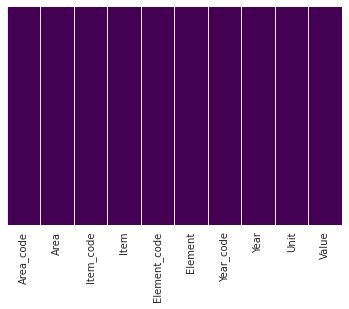

In [8]:
#to see null visually use heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # yticklabels=False-> not want indexs on y axis index means row of all col
#null values:-shown in yellow colr by using viridis

In [9]:
def unique_value(col):
  list=[]
  for i in df[col]:
    if i not in list:
      list.append(i)
  print(list)
unique_value('Area') #146 value
unique_value('Year') #16 value
unique_value('Element') #6 value

['Armenia', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Barbados', 'Bangladesh', 'Bhutan', 'Botswana', 'Brazil', 'Belize', 'Brunei Darussalam', 'Bulgaria', 'Myanmar', 'Burundi', 'Central African Republic', 'Sri Lanka', 'Chile', 'China, mainland', 'Colombia', 'Congo', 'Costa Rica', 'Cyprus', 'Azerbaijan', 'Benin', 'Denmark', 'Dominican Republic', 'Belarus', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Gabon', 'Gambia', 'Germany', 'Bosnia and Herzegovina', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'China, Hong Kong SAR', 'Hungary', 'Croatia', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', "Côte d'Ivoire", 'Kazakhstan', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Cambodia', 'Republic of Korea', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Marshall Islands', 'China, Macao SAR', 'Madagascar', 'Malaysia', 'Maldiv

In [10]:
for col in df.columns:
  if df[col].dtype==np.dtype('object'):
    print(col,':',len(df[col].unique()),'labels')

Area : 146 labels
Item : 23 labels
Element : 6 labels
Unit : 2 labels


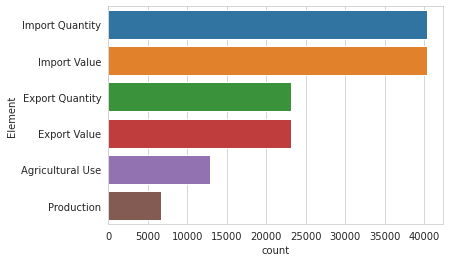

In [11]:
#Element,Area,Item
#countplot->Show the number of datapoints with each value of a categorical variable  #hue->legend
# plt.figure(figsize =(16, 20))
sns.set_style('whitegrid')
sns.countplot(data=df, y="Element")

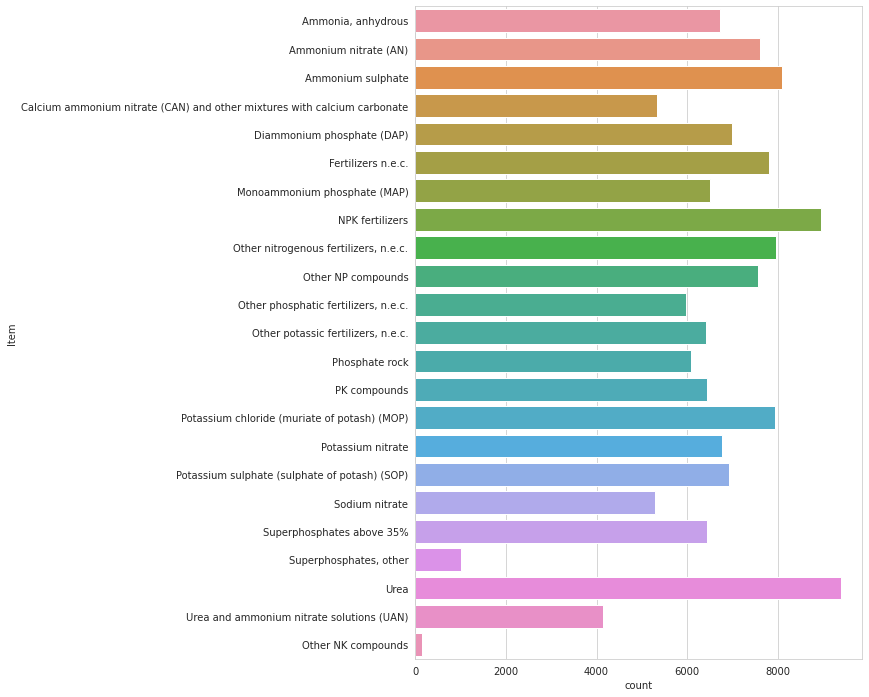

In [12]:
#y=df["Item"].count().sort_valures(desc=True).head(17)
#plt.figure(figsize =(20, 20))
plt.figure(figsize =(8, 12))
sns.countplot(data=df, y=df["Item"])

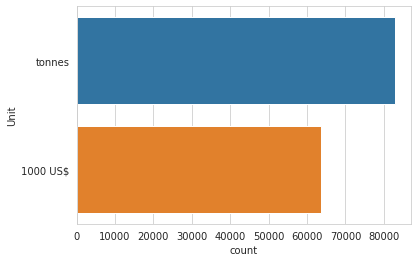

In [13]:

sns.countplot(data=df, y=df["Unit"])

In [14]:
#sns.countplot(data=df, y=df["Area"])

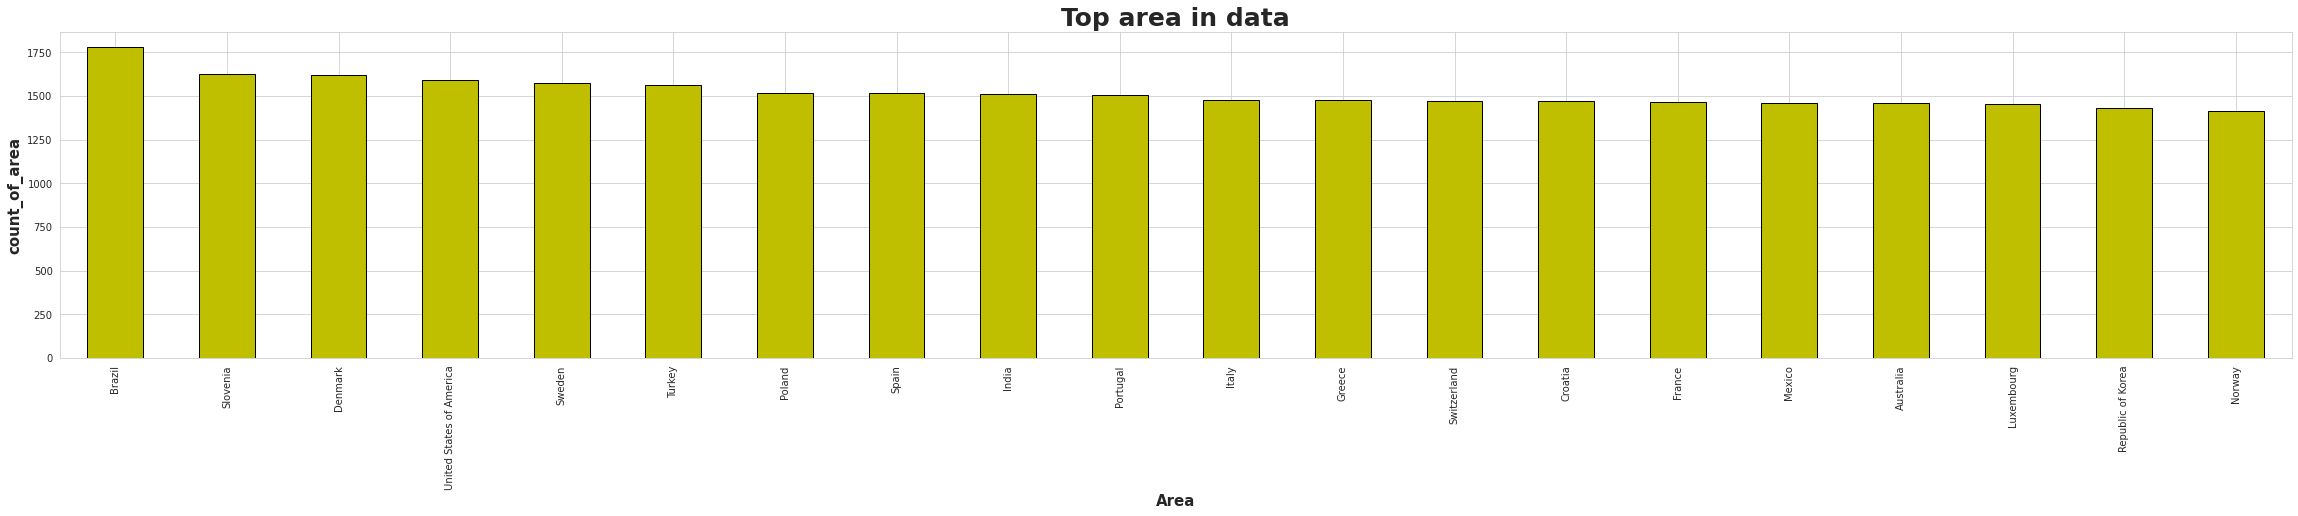

In [15]:
#????????????????????//
plt.figure(figsize=(40,6))
Area_count = df['Area'].value_counts()
#sns.barplot(Area_count.index,Area_count.values, alpha=0.8)
Area_count.head(20).plot.bar(color='y',edgecolor='k')    ##?????

plt.title('Top area in data',fontsize=25,fontweight='bold')
plt.xlabel('Area',fontsize=15,fontweight='bold')
plt.ylabel('count_of_area',fontsize=15,fontweight='bold')    #?????
plt.show()

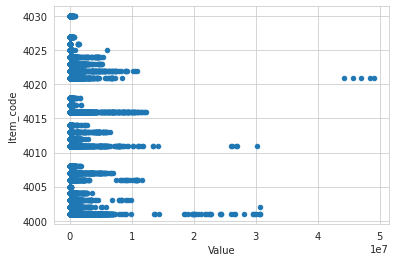

In [16]:
df.plot.scatter("Value","Item_code")

Outlier

Text(0, 0.5, 'Area_code')

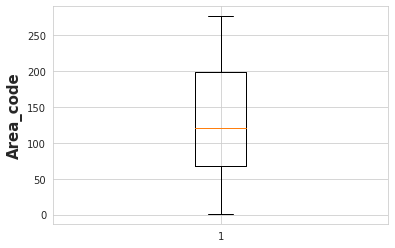

In [17]:
plt.boxplot(df['Area_code'])
plt.ylabel('Area_code',fontsize=15,fontweight='bold')   #->area_code from 125 to 200 have 50% to 75% value (that is max count)

In [18]:
df["Area_code"].value_counts() 

21     1779
198    1626
54     1621
231    1592
210    1575
       ... 
128     281
219     238
178     184
37      164
127      58
Name: Area_code, Length: 146, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb36dc9650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb36de7110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb36dc9050>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb36de7bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb36ddf150>],
 'means': []}

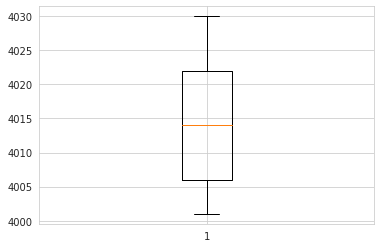

In [19]:
plt.boxplot(df['Item_code'])

In [20]:
df["Item_code"].value_counts() 

4001    9390
4021    8964
4002    8091
4008    7972
4016    7937
4030    7816
4003    7614
4024    7565
4022    6986
4017    6929
4025    6770
4007    6728
4023    6514
4027    6439
4012    6433
4018    6415
4011    6081
4014    5984
4004    5345
4005    5281
4006    4139
4013    1003
4026     154
Name: Item_code, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb34e01d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb34e12850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb34e01790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb34e13350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb34e13890>],
 'means': []}

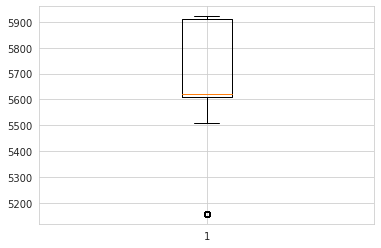

In [21]:
plt.boxplot(df['Element_code'])

In [22]:
df["Element_code"].value_counts() 

5610    40388
5622    40388
5910    23164
5922    23164
5157    12847
5510     6599
Name: Element_code, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb34947d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb3495a850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb34947790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb3495f350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb3495f890>],
 'means': []}

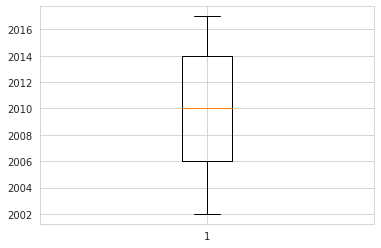

In [23]:
plt.boxplot(df['Year_code'])

In [24]:
df.quantile([0.25,0.75])

,Area_code,Item_code,Element_code,Year_code,Year,Value
0.25,67.0,4006.0,5610.0,2006.0,2006.0,50.8825
0.75,198.0,4022.0,5910.0,2014.0,2014.0,16683.4550


In [25]:
df["Year"].value_counts()  ##2014-2017->26.07,  2007-2013->45.2,  2002-2006->28.664

2011    10079
2014     9710
2010     9683
2016     9643
2013     9604
2009     9525
2015     9518
2012     9359
2017     9336
2008     9148
2007     8937
2006     8737
2005     8558
2004     8388
2003     8260
2002     8065
Name: Year, dtype: int64

In [26]:
df.shape

(146550, 10)

In [27]:
df.drop(['Area_code','Item_code','Element_code','Year_code'],axis =1,inplace =True)

In [28]:
df.drop_duplicates()

,Area,Item,Element,Year,Unit,Value
0,Armenia,"Ammonia, anhydrous",Import Quantity,2006,tonnes,0.01
1,Armenia,"Ammonia, anhydrous",Import Quantity,2007,tonnes,32.88
2,Armenia,"Ammonia, anhydrous",Import Quantity,2008,tonnes,62.19
3,Armenia,"Ammonia, anhydrous",Import Quantity,2009,tonnes,119.93
4,Armenia,"Ammonia, anhydrous",Import Quantity,2010,tonnes,94.17
...,...,...,...,...,...,...
146545,Sudan,Urea and ammonium nitrate solutions (UAN),Import Value,2013,1000 US$,832.49
146546,Sudan,Urea and ammonium nitrate solutions (UAN),Import Value,2014,1000 US$,557.58
146547,Sudan,Urea and ammonium nitrate solutions (UAN),Import Value,2015,1000 US$,233.38
146548,Sudan,Urea and ammonium nitrate solutions (UAN),Import Value,2016,1000 US$,1034.35


In [29]:
df1=pd.get_dummies(df,columns=['Area','Element','Item','Unit'],drop_first =True)
print(df1.shape)

(146550, 175)


In [30]:
df1.columns

Index(['Year', 'Value', 'Area_Albania', 'Area_Algeria', 'Area_Angola',
       'Area_Argentina', 'Area_Armenia', 'Area_Australia', 'Area_Austria',
       'Area_Azerbaijan',
       ...
       'Item_Phosphate rock',
       'Item_Potassium chloride (muriate of potash) (MOP)',
       'Item_Potassium nitrate',
       'Item_Potassium sulphate (sulphate of potash) (SOP)',
       'Item_Sodium nitrate', 'Item_Superphosphates above 35%',
       'Item_Superphosphates, other', 'Item_Urea',
       'Item_Urea and ammonium nitrate solutions (UAN)', 'Unit_tonnes'],
      dtype='object', length=175)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146550 entries, 0 to 146549
Columns: 175 entries, Year to Unit_tonnes
dtypes: float64(1), int64(1), uint8(173)
memory usage: 26.4 MB


In [32]:
df1.head(1)

,Year,Value,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,...,Item_Phosphate rock,Item_Potassium chloride (muriate of potash) (MOP),Item_Potassium nitrate,Item_Potassium sulphate (sulphate of potash) (SOP),Item_Sodium nitrate,Item_Superphosphates above 35%,"Item_Superphosphates, other",Item_Urea,Item_Urea and ammonium nitrate solutions (UAN),Unit_tonnes
0,2006,0.01,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
Y= df1['Value']

In [34]:
df1.drop("Value",inplace=True,axis=1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2=pd.DataFrame(data=scaler.fit_transform(df1),columns=df1.columns)

In [36]:
df2.describe()

,Year,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,Area_Bahrain,...,Item_Phosphate rock,Item_Potassium chloride (muriate of potash) (MOP),Item_Potassium nitrate,Item_Potassium sulphate (sulphate of potash) (SOP),Item_Sodium nitrate,Item_Superphosphates above 35%,"Item_Superphosphates, other",Item_Urea,Item_Urea and ammonium nitrate solutions (UAN),Unit_tonnes
count,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,...,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000
mean,0.516143,0.005827,0.006633,0.005329,0.009608,0.003978,0.009969,0.008461,0.005609,0.004817,...,0.041494,0.054159,0.046196,0.047281,0.036035,0.043896,0.006844,0.064074,0.028243,0.566346
std,0.302901,0.076115,0.081170,0.072807,0.097547,0.062947,0.099348,0.091596,0.074683,0.069241,...,0.199431,0.226332,0.209910,0.212240,0.186379,0.204865,0.082446,0.244885,0.165667,0.495580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
X=df2

In [38]:
X.shape,Y.shape

((146550, 174), (146550,))

In [39]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=7)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(117240, 174) (29310, 174) (117240,) (29310,)


In [40]:
def eval_fun(Y_test,Y_pred):
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
  r2 = r2_score(Y_test,Y_pred)
  mse = mean_squared_error(Y_test,Y_pred)
  mae = mean_absolute_error(Y_test,Y_pred)
  return r2,mse,mae

In [41]:
#Linear REgression(lr_model)
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train,Y_train)
y_pred_lr = lr_model.predict(X_test)
#r2,mse,mae for lr model
r2,mse,mae = eval_fun(Y_test,y_pred_lr)
print("r2 score: ",r2,"mean_squared_error: ",mse,"mean_absolute_error: ",mae)

r2 score:  0.1263662331457973 mean_squared_error:  400832159717.05585 mean_absolute_error:  181353.36912282498


In [42]:
#predict on test data
predictions=lr_model.predict(X_test[:5])
print("Predicted values are: ",predictions)
print("Real value are: ",Y_test[:5])

Predicted values are:  [ -8192.  56320.  64512. 138240. -52224.]
Real value are:  145666        0.00
81706     82216.14
94045       114.71
123093      109.00
141486      125.77
Name: Value, dtype: float64


In [43]:
X_test.head(2)

,Year,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,Area_Bahrain,...,Item_Phosphate rock,Item_Potassium chloride (muriate of potash) (MOP),Item_Potassium nitrate,Item_Potassium sulphate (sulphate of potash) (SOP),Item_Sodium nitrate,Item_Superphosphates above 35%,"Item_Superphosphates, other",Item_Urea,Item_Urea and ammonium nitrate solutions (UAN),Unit_tonnes
145666,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
81706,0.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
##Decsion Tree(tree)
tree = DecisionTreeRegressor()
tree.fit(X_train,Y_train)
y_pred_tree = tree.predict(X_test)

#r2,mse,mae for dt model
r2,mse,mae = eval_fun(Y_test,y_pred_tree)
print("r2 score: ",r2,"mean_squared_error: ",mse,"mean_absolute_error: ",mae)

r2 score:  0.6882625397853395 mean_squared_error:  143028353737.39084 mean_absolute_error:  30197.08590276356


In [45]:
#predict on test data
predictions=tree.predict(X_test[:5])
print("Predicted values are: ",predictions)
print("Real value are: ",Y_test[:5])

Predicted values are:  [2.000000e-02 8.290871e+04 1.516800e+02 6.024000e+01 2.084300e+02]
Real value are:  145666        0.00
81706     82216.14
94045       114.71
123093      109.00
141486      125.77
Name: Value, dtype: float64


In [46]:
##Random Forest(model)
#increase no of trees and see the effect
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators = 30 , random_state=30)
model.fit(X_train,Y_train)
y_pred_RF = model.predict(X_test)
#r2,mse,mae for dt model
r2,mse,mae = eval_fun(Y_test,y_pred_RF)
print("r2 score: ",r2,"mean_squared_error: ",mse,"mean_absolute_error: ",mae)

r2 score:  0.7025498508039042 mean_squared_error:  136473188461.73787 mean_absolute_error:  39504.39131385572


In [47]:
Y_pred_rf = model.predict(X_test)

In [48]:
#predict on test data
predictions=model.predict(X_test[:5])
print("Predicted values are: ",predictions)
targets = Y_test[:5]
print("Real value are: ",Y_test[:5])

Predicted values are:  [ 1968.117      85333.54333333   476.492         97.806
   183.66      ]
Real value are:  145666        0.00
81706     82216.14
94045       114.71
123093      109.00
141486      125.77
Name: Value, dtype: float64


In [49]:
def rmse(Y_test,Y_pred):
  from sklearn.metrics import mean_squared_error
  import numpy as np
  mse = mean_squared_error(Y_test,Y_pred)
  rmse=np.sqrt(mse)
  return rmse
rmse(Y_test,Y_pred_rf)

369422.77739974